To generate the dataset,
we sampled k centers from a 15-dimensional spherical Gaussian
distribution with mean at the origin and variance R ∈
{1, 10, 100}. We then added points from Gaussian distributions
of unit variance around each center. Given the k centers,
this is a mixture of k spherical Gaussians with equal
weights. Note that the Gaussians are separated in terms
of probability mass — even if only marginally for the case
R = 1 — and therefore the value of the optimal k-clustering
can be well approximated using the centers of these Gaussians.
The number of sampled points from this mixture of
Gaussians is n = 10, 000.

In [29]:
%%file simulatedData.py

import numpy as np
def generate_centers(k, var):
    """Generate k centers from 15-dimensional spherical Gaussian distribution with the given variance"""
    centers = np.random.multivariate_normal(np.zeros(2),  np.eye(2)*var, k)
    return centers

def generate_data(k, var):
    """Generate data points around each center such that there are 10,000 data points total including the centers?
    This could also be 10000 data points total plus the centers if this is better? Just chance the -k in 
    the sampData line"""
    # generate centers
    centers = generate_centers(k, var)
    # array to store points #
    points = np.empty([1,2])
    # generate data around each center
    for i in range(k):
        points = np.concatenate((points, np.random.multivariate_normal(centers[i],np.eye(2),100000)), axis=0)
        points = np.delete(points, 0, axis=0)
    # sample points from array and combine these with centers
    sampData = np.concatenate((centers, points[np.random.choice(len(points),100000-k)]), axis = 0)
    return(sampData)

Overwriting simulatedData.py


In [34]:
from simulatedData import generate_data

dataTest = generate_data(3, 50)
len(dataTest)

100000

In [9]:
dataTest[:,2]

array([ 0.05612459, -0.53262457,  1.65395441, ...,  0.21580686,
       -0.11072065,  1.26291384])

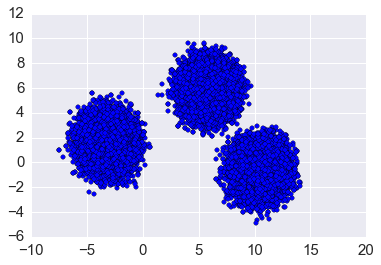

In [35]:
plt.scatter(dataTest[:,0], dataTest[:,1])